# Regresie Logistică

* Tudor Berariu - 2018
* Alexandru Sorici - 2020

In [2]:
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [8]:
import numpy as np
%matplotlib inline
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

## 1. Scopul Laboratorului

Scopul laboratorului îl reprezintă înțelegerea algoritmului de **regresie logistică** și a rezolvării unei probleme de clasificare prin aplicarea principiului de **estimare a verosimilității maxime (eng. Maximum Likelihood Estimation)**.
De asemenea, vom aplica **metoda scăderii gradientului (eng. gradient descent)** pentru a rezolva o problemă de minimizare.

Regresia logistică este aplicabilă atunci când dorim să rezolvăm o problemă de **clasificare** (în mod standard **binară**, dar metoda poate fi extinsă și pentru caz multinomial).

Variabilele folosite în predicție (peste care se aplică regresia) pot fi:
  - variabile continue (date numerice)
  - variabile discrete nominale, i.e. date care provin din niște categorii cu un domeniu de valori finit (e.g. culoarea parului, zilele saptamanii)
  - variabile discrete ordinale, i.e. date care suportă o relație de ordine (e.g. numarul de stelute la o recenzie de produs)
  
 **Ipoteza de învățare** este că variabilele de predicție se află într-o relație **liniară** cu "**log odds**" al varibilei dependente (cea pe care dorim să o clasificăm binar).


$$p = P(y=1 \vert {\bf x}; {\bf \theta})$$
$$l = ln(\frac{p}{1-p}) = w_0 + w_1 x_1 + \cdots + w_n x_n $$

Rezultă că **probabilitatea** $p$, ca un exemplu să facă parte din clasa "pozitivă" este modelată cu ajutorul funcției logistice $\sigma(a) = \frac{1}{1+e^{-a}}$

$$p = \frac{1}{1+ e^{-(w_0 + w_1 x_1 + \cdots + w_n x_n)}}$$

![sigmoid function](img/sigmoid.png)

## 2. Maximum Likelihood Estimation (MLE) pentru Regresie Logistică

Se dă setul de date (**X**, **t**) constând dintr-o mulțime **X** de N eșantioane de dimensiune D (i.e. fiecare ${\bf x^{(i)}} \in {\bf X}$ este de forma ${\bf x} = (x_1, x_2, ..., x_D)$) (fiecare eșantion are D atribute).
Pentru fiecare ${\bf x}^{(n)} \in X$ exista un $t^{(n)} \in {0, 1}$, reprezentând **clasa** din care face parte exemplul ${\bf x}^{(n)}$.

La fel ca în cazul Regresiei Liniare, putem aplica asupra datelor de intrare funcții de transformare $\phi$ astfel incât $\phi^{(n)} = \phi(x^{(n)})$.
Predictia data de regresia logistică pentru $x^{(n)}$ este $y^{(n)} = \sigma({\bf w^T \phi^{(n)}} )$

Astfel, rezulta setul de date $\{{\bf \Phi}, {\bf t}\}$ pentru care vom formula expresia de Maximum Likelihood al datelor ca:

$$p({\bf t} \vert {\bf w}) = \prod_{n=1}^{N}{y^{(n)}}^{t^{(n)}}(1 - y^{(n)})^{1-t^{(n)}}$$

Pentru stabilitate numerica, in loc de **maximizarea** MLE-ului, vom logaritma expresia si vom **minimiza** **negative log likelihood (NLL)**.

$$J({\bf w}) = -ln(p({\bf t} \vert {\bf w})) = - \sum_{n=1}^{N} \left[t^{(n)}ln(y^{(n)}) + (1-t^{(n)})ln(1 - y^{(n)})\right]$$

## 3. Minimizarea folosind metoda scăderii gradientului

Algoritmul de minimizare a unei functii obiectiv $J({\bf w})$ folosind scaderea gradientului are forma urmatoare:

![gradient descent](img/alg-gradient-descent.png)

unde gradientul functiei $J({\bf w})$ este:
    
$$\nabla_{\bf w} J({\bf w}) = \sum_{n=1}^{N} (y^{(n)} - t^{(n)}) \phi^{(n)} $$

iar $\alpha$ este **rata de invățare** care controlează "lungimea" pasului în direcția opusă gradientului.

## 4. Setul de date

In [9]:
def two_clusters(N, variance=0.1):
    N1 = N // 2
    N2 = N - N1
    X1 = np.random.randn(N1, 2) * variance + 0.25
    X2 = np.random.randn(N2, 2) * variance + 0.75
    X = np.concatenate([X1, X2], axis=0)
    T = np.concatenate([np.zeros((N1)), np.ones((N2))], axis=0)
    p = np.random.permutation(N)
    return X[p], T[p]

In [10]:
def visualize_dataset(X, T, Y=None):
    m = ["x", "o"]  # Indicates true class
    col = ["red", "blue"]  # Indicates prediction
    fig = plt.figure(); plt.axis('equal')
    if Y is not None:
        idx_tp = np.logical_and(T >= .5, Y >= .5) # True positives
        idx_fp = np.logical_and(T < .5, Y >= .5) # False positives
        idx_fn = np.logical_and(T >= .5, Y < .5) # False negatives
        idx_tn = np.logical_and(T < .5, Y < .5) # True negatives

        plt.scatter(X[idx_tp,0], X[idx_tp,1], marker=m[0], c="red", label="TP")
        plt.scatter(X[idx_fp,0], X[idx_fp,1], marker=m[1], c="red", label="FP")
        plt.scatter(X[idx_fn,0], X[idx_fn,1], marker=m[0], c="blue", label="FN")
        plt.scatter(X[idx_tn,0], X[idx_tn,1], marker=m[1], c="blue", label="TN")

    else:
        idx_pos, idx_neg = (T > .5), (T < .5)
        plt.scatter(X[idx_pos,0], X[idx_pos,1], marker=m[0], color="blue", label="Pos")
        plt.scatter(X[idx_neg,0], X[idx_neg,1], marker=m[1], color="blue", label="Neg")

    plt.xlabel("x"); plt.ylabel("y")
    plt.legend(bbox_to_anchor=(0, 1), loc='upper left', ncol=1)
    return fig.axes[0]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

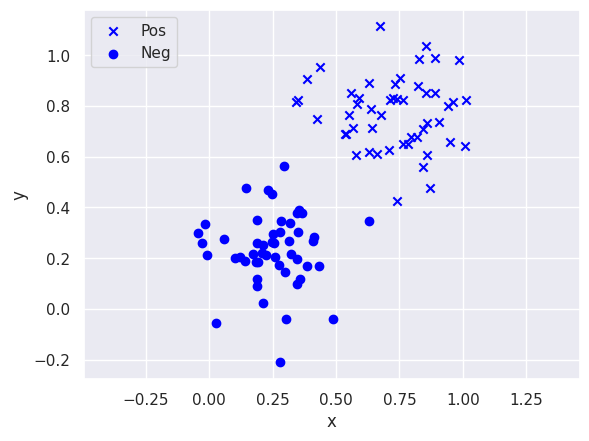

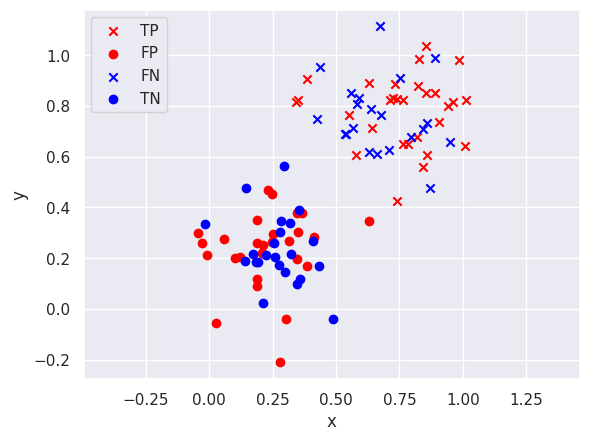

In [11]:
X, T = two_clusters(100, variance=0.15)
visualize_dataset(X, T, Y=None);
visualize_dataset(X, T, Y=np.random.uniform(size=T.size));

### Setul de date extins

Dorim sa testam robustetea regresiei logistice la adaugarea unor exemple extreme din clasa pozitivă.

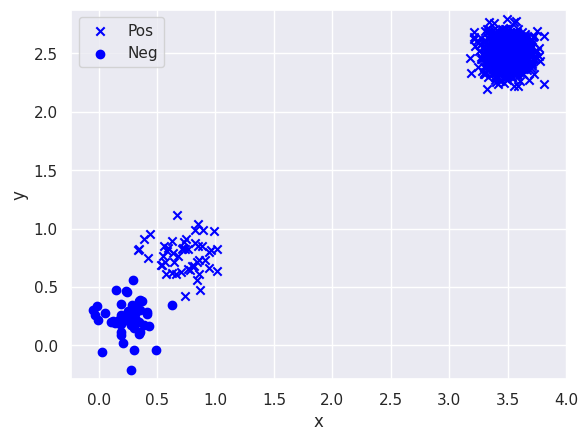

In [12]:
extra_N = 800
extra_X = np.random.randn(extra_N, 2) * 0.1
extra_X[:,1] += 2.5
extra_X[:,0] += 3.5
extra_T = np.ones(extra_N)
X_full = np.concatenate([X, extra_X], axis=0)
T_full = np.concatenate([T, extra_T], axis=0)

ax = visualize_dataset(X_full, T_full, Y=None);
#__x = np.linspace(0, 1, 100)
#__y = (.5 - __x * W[0] - W[2]) / W[1]

#plt.plot(__x, __y, c="black", axes=ax)

## 5.1 - Cerinta 1: Implementarea functiei de sigmoida logistica

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$


In [17]:
# TODO <1>: Implementati functia de sigmoida logistica
from numpy import exp
def logistic(x):
    return 1 / (1 + exp(-x))

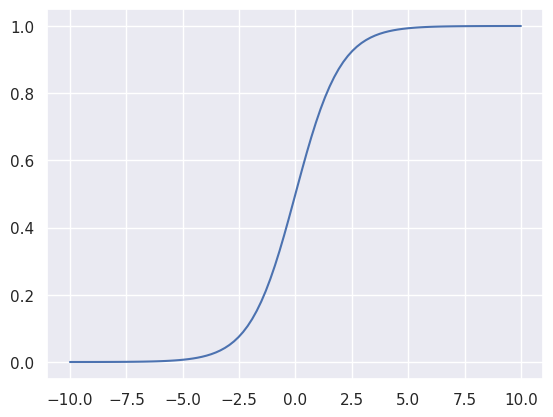

In [18]:
x = np.linspace(-10, 10, 100)
plt.figure()
plt.plot(x, logistic(x))

## 5.2 - Cerinta 2: Antrenarea modelului pentru clasificare

In [26]:
# TODO <2.1>: Implementati expresia pentru Negative Log Likelihood - functia J(w)
from numpy import log, round

def nll(Y, T):
    return -np.transpose(T) @ log(Y) - (1 - np.transpose(T)) @ log(1 - Y)

# TODO <2.2>: Implementati expresia care intoarce acuratetea clasificarii
def accuracy(Y, T):
    return sum(round(Y) == T) / len(Y)

print("NLL:", nll(np.random.uniform(size=(100)), T))
print("Accuracy: ", accuracy(np.random.uniform(size=(100)), T))

NLL: 94.52312926641986
Accuracy:  0.47


In [27]:
def split_dataset(X, T, train=.8):
    N = X.shape[0]
    N_train = int(round(N * train))
    N_test = N - N_train

    X_train, X_test = X[:N_train,:], X[N_train:,:]
    T_train, T_test = T[:N_train], T[N_train:]
    return X_train, T_train, X_test, T_test


In [52]:
MAX_ERROR_ALLOWED = 0.01

def train_logistic(X, T, lr=.01, epochs_no=100):
    # TODO <2.3> : Antrenati modelul logistic (ponderile W), executand epochs_no pasi din algoritmul de gradient descent
    (N, D) = X.shape
    X_hat = np.concatenate([X, np.ones((N, 1))], axis=1)
    W = np.random.randn((D+1))

    epochs = 0

    while epochs < epochs_no:
      next_W = W - lr * np.transpose(X_hat) @ (predict_logistic(X_hat, W) - T)

      if np.linalg.norm(next_W - W, 2) < MAX_ERROR_ALLOWED:
        return next_W
      W = next_W
      epochs_no += 1

    return W

def predict_logistic(X, W):
    # TODO <2.4> : Calculati predictia Y a modelului logistic antrenat (ponderile W invatate)
    return logistic(X @ W)

### 5.3 Testarea pe setul de date Two Clusters

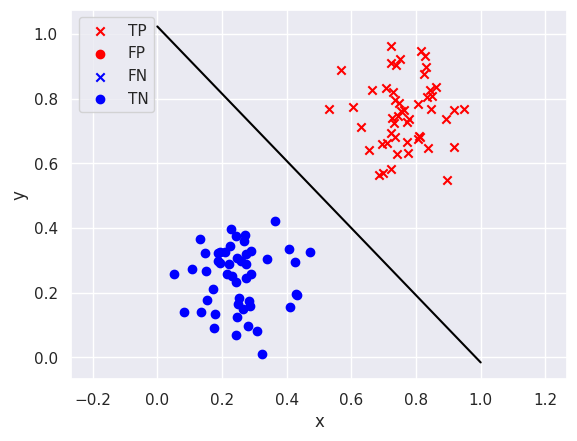

In [40]:
X, T = two_clusters(100, variance=0.1)
W = train_logistic(X, T, lr=.1, epochs_no=1000)
X = np.concatenate([X, np.ones((100, 1))], axis=1) # TODO: ask for this thing
Y = predict_logistic(X, W)
ax = visualize_dataset(X, T, Y);

__x = np.linspace(0, 1, 100)
__y = (-__x * W[0] - W[2]) / W[1]

plt.plot(__x, __y, c="black", axes=ax)

### 5.4 Testare pe setul de date Two Clusters Extins

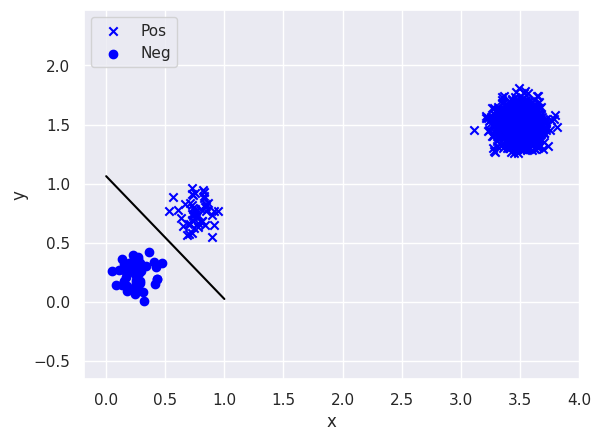

In [49]:
extra_N = 800
extra_X = np.random.randn(extra_N, 2) * 0.1
extra_X[:,1] += 1.5
extra_X[:,0] += 3.5
extra_T = np.ones(extra_N)
extra_X = np.concatenate([extra_X, np.ones((extra_N, 1))], axis=1)
X_full = np.concatenate([X, extra_X], axis=0)
T_full = np.concatenate([T, extra_T], axis=0)

ax = visualize_dataset(X_full, T_full, Y=None);
__x = np.linspace(0, 1, 100)
__y = (.5 - __x * W[0] - W[2]) / W[1]

plt.plot(__x, __y, c="black", axes=ax)

[[0.84635143 0.76709526 1.        ]
 [0.68456867 0.5648584  1.        ]
 [0.77103165 0.72905941 1.        ]
 ...
 [3.51052944 1.60301693 1.        ]
 [3.56069775 1.47076081 1.        ]
 [3.48046234 1.47557766 1.        ]]
(900, 3)
(3,)


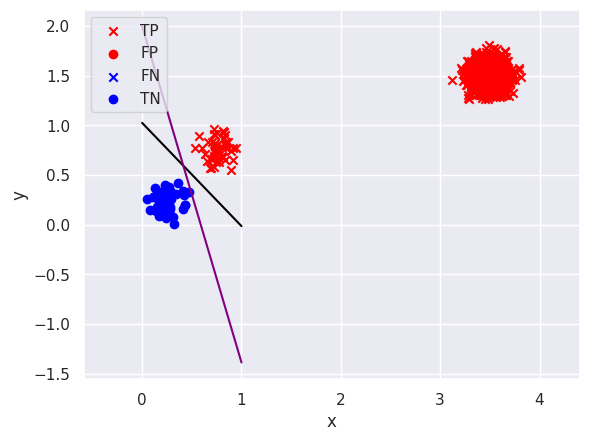

In [62]:
W_full = train_logistic(X_full[:, :-1], T_full, lr=.1, epochs_no=10000)

Y = predict_logistic(X_full, W_full)
ax = visualize_dataset(X_full, T_full, Y);

__x = np.linspace(0, 1, 100)
__y = (- __x * W[0] - W[2]) / W[1]
plt.plot(__x, __y, c="black", axes=ax)

__y = (- __x * W_full[0] - W_full[2]) / W_full[1]
plt.plot(__x, __y, c="purple", axes=ax)


### 5.5 Vizualizarea curbei de loss si a celei de acuratete

In [71]:
def train_logistic_full(X, T, lr=.01, epochs_no=100):
    (N, D) = X.shape
    X1 = np.concatenate([np.ones((N, 1)), X], axis=1)
    W = np.random.randn((D+1))

    X_train, T_train, X_test, T_test = split_dataset(X1, T)

    train_acc, test_acc = [], []
    train_nll, test_nll = [], []
    W_trace = [W.copy()]

    for epoch in range(epochs_no):
        # TODO <2.5>
        # Y_train = ...

        Y_train = 1. / (1. + np.exp(-X_train @ W))

        # Update parameters - Gradient Descent
        W = W - lr * np.transpose(X_train) @ (Y_train - T_train)

        # X.T
        # Just for plotting
        Y_test = 1. / (1. + np.exp(-np.dot(X_test, W)))
        train_acc.append(accuracy(Y_train, T_train))
        test_acc.append(accuracy(Y_test, T_test))
        train_nll.append(nll(Y_train, T_train))
        test_nll.append(nll(Y_test, T_test))
        W_trace.append(W.copy())

    return W, train_acc, test_acc, train_nll, test_nll, W_trace

In [72]:
def plot_evolution(train_acc, test_acc, train_nll, test_nll):
    epochs_no = len(train_acc)
    fig, (ax1, ax2) = plt.subplots(2,1);
    ax1.plot(range(epochs_no), train_acc, sns.xkcd_rgb["green"], label="Train Accuracy")
    ax1.plot(range(epochs_no), test_acc, sns.xkcd_rgb["red"], label="Test Accuracy")
    ax1.set_ylabel("Accuracy")
    ax1.legend(loc='lower right', ncol=1)

    ax2.plot(range(epochs_no), train_nll, sns.xkcd_rgb["green"], label="Train NLL")
    ax2.plot(range(epochs_no), test_nll, sns.xkcd_rgb["red"], label="Test NLL")
    ax2.set_xlabel("iteration")
    ax2.set_ylabel("NLL")
    ax2.legend(loc='upper right', ncol=1);
    return (ax1, ax2)

#### Vizualizarea curbei de antrenare pentru setul de date Two Clusters extins

<ipython-input-26-3a5dfb5ed6c5>:5: RuntimeWarning: divide by zero encountered in log
  return -np.transpose(T) @ log(Y) - (1 - np.transpose(T)) @ log(1 - Y)
<ipython-input-26-3a5dfb5ed6c5>:5: RuntimeWarning: invalid value encountered in matmul
  return -np.transpose(T) @ log(Y) - (1 - np.transpose(T)) @ log(1 - Y)


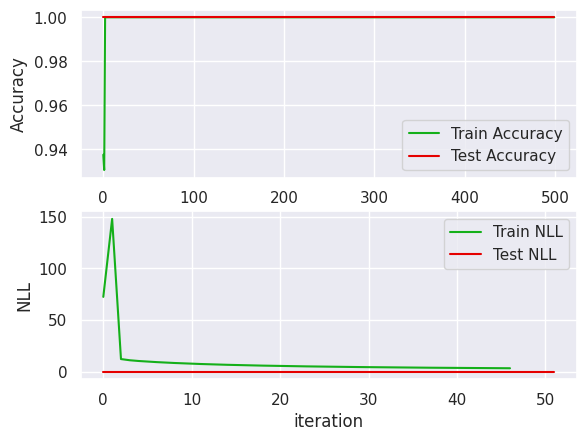

In [73]:
EPOCHS_NO = 500
results = train_logistic_full(X_full[:, :-1], T_full, lr=.1, epochs_no=EPOCHS_NO)

W, train_acc, test_acc, train_nll, test_nll, W_trace = results
plot_evolution(train_acc, test_acc, train_nll, test_nll);


del EPOCHS_NO, results, W, train_acc, test_acc, train_nll, test_nll, W_trace

![NLL and Accuracy](img/nll-acc.png)

### 6. Analiza

1. Care este influenta adaugarii punctelor pozitive extreme? Afecteaza ele rezultatul clasificarii?
2. Putem sa folosim regresia liniara pentru a clasifica setul de date Two Clusters extins? Care ar fi rezultatul daca am face acest lucru?

1. Da / Nu. Motivație...